# Homework 2 - eCommerce analytics

### [RQ1] A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 
#### 1) view, 2) cart, 3) purchase. 
#### Which is the rate of complete funnels? 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import time
import functions as mod 
import functions1 as modd 
import rq1_funcs as Rq1

In [4]:
def read_both_datasets():
    dataset = pd.concat([pd.read_csv('../dataset/2019-Oct.csv'),pd.read_csv('../dataset/2019-Nov.csv')]) 
    dataset = dataset.reset_index()
    dataset_oct=pd.read_csv("../dataset/2019-Oct.csv", header="infer", parse_dates=["event_time"],date_parser=pd.to_datetime)
    dataset_nov=pd.read_csv("../dataset/2019-Nov.csv", header="infer", parse_dates=["event_time"],date_parser=pd.to_datetime)
    return dataset,dataset_oct,dataset_nov

def read_sample_dataset():
    dataset = pd.read_csv("../dataset/sample_dataset.csv")
    dataset = dataset.reset_index()
    return dataset

In [5]:
dataset,dataset_oct,dataset_nov = read_both_datasets()
dataset_oct1 = dataset_oct
dataset_nov1 = dataset_nov
frames = [dataset_oct1, dataset_nov1]
dataset1 = pd.concat(frames)
dataset1 = dataset1.reset_index()
dataset.head()

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


#### (a) What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view / removefromchart etc).

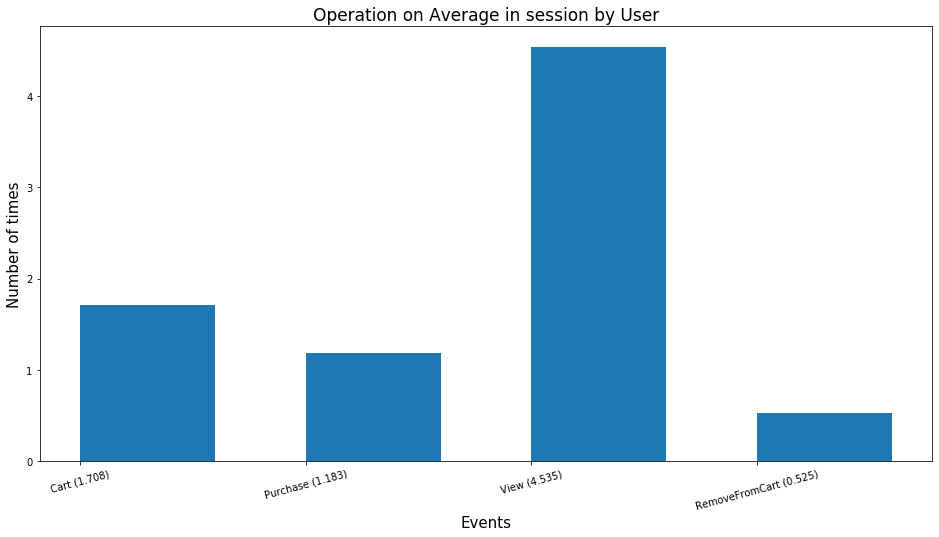

In [18]:
#Getting event-type on every user_session
Rq1.on_avg_userSess(dataset)

#### (b) How many times, on average, a user views a product before adding it to the cart?

In [19]:
#Pivot Table according to Index "User ID" and "Product ID" and Columns are values of "Event Type" View, Cart and Purchase
Index_label,_ = Rq1.user_view_prod(dataset)

<BarContainer object of 1 artists>

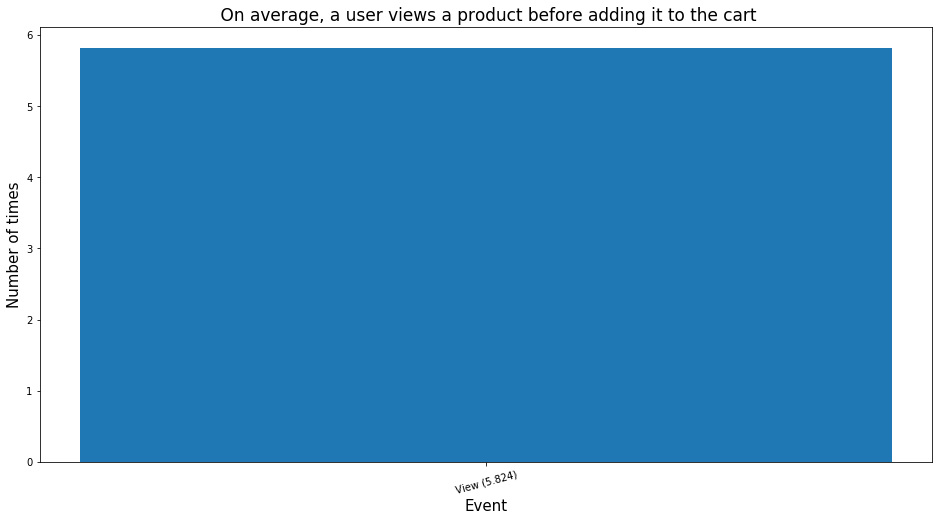

In [20]:
#Getting mean of the View and Plotting it
mean = np.round(Index_label['view'].mean(),3)
plt.figure(figsize=(16,8))
plt.title(" On average, a user views a product before adding it to the cart",fontsize=17)
plt.xlabel("Event",fontsize=15)
plt.ylabel("Number of times",fontsize=15)
plt.xticks(rotation=15)
plt.bar(['View ({})'.format(mean)],mean,width = 0.7)

#### (c) What’s the probability that products added once to the cart are effectively bought?

In [21]:
#Finding Probability of Product bought after adding to CART
_ ,OnAverage_viewProduct = Rq1.user_view_prod(dataset)
Index_label_C = Rq1.find_prob(OnAverage_viewProduct)

In [22]:
Index_label_Probability_avg = np.round(Index_label_C['probability in %'].mean(),5)
print("Probability of product added to cart are effectively on Average is {} %".format(Index_label_Probability_avg))

Probability of product added to cart are effectively on Average is 57.46018 %


#### (d) What’s the average time an item stays in the cart before being removed?

  **!--- As "RemoveFromCart" value is absent in Event_type, It is not possible to solve" ---!**

#### (e) How much time passes on average between the first view time and a purchase/addition to cart?

In [6]:
toShow,finalData,in_min = Rq1.avg_on_viewPurch(dataset)
print("Data with View Time and Cart Time Separated")
pd.DataFrame(toShow[["View Time","Purchase / Cart Time"]]).head(10)

C:\Users\Zain\Desktop\ROMA\Sapienza\ADM\HW2\scripts\rq1_funcs.py:46: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  dataset = dataset.sort_index(by=["user_id"]).head(10000000)#109950743
C:\Users\Zain\Desktop\ROMA\Sapienza\ADM\HW2\scripts\rq1_funcs.py:48: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  Sample = Sample.sort_index(by=["user_id","event_time","product_id"])


Data with View Time and Cart Time Separated


C:\Users\Zain\Desktop\ROMA\Sapienza\ADM\HW2\scripts\rq1_funcs.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up_data['Difference'] = up_time


View Time Purchase / Cart Time
user_id   product_id                                          
74383042  30901102    2019-11-19 10:00:21  2019-11-19 10:03:47
94566147  1005007     2019-11-11 07:32:29  2019-11-12 08:03:18
107837897 4700199     2019-11-13 17:09:21  2019-11-27 13:53:04
          4700419     2019-11-13 17:16:41  2019-11-28 08:35:30
          4700557     2019-11-23 14:59:48  2019-11-29 04:54:45
121339215 13400001    2019-11-25 07:45:46  2019-11-25 07:46:29
124298297 49100002    2019-11-18 13:51:26  2019-11-18 13:54:58
125917727 30100067    2019-11-08 17:12:46  2019-11-08 17:14:26
126150271 26900069    2019-11-23 05:31:41  2019-11-23 05:31:55
128968633 1004888     2019-11-11 13:26:44  2019-11-22 13:52:55

**Average time between first View and Cart is 30 hours as mentioned below, because of some anomalies**
*Like some of the client have time difference like 15 days, Thats why average is boosted upto 30 Hours*

In [11]:
print("Average between the first view time and a purchase/addition to cart is {} hours".format(np.round(np.mean(in_min)/60),3))  
print("Data with View Time and Cart Time (Time Difference)")
finalData.iloc[:,2:].head(30)

Average between the first view time and a purchase/addition to cart is 30.0 hours
Data with View Time and Cart Time (Time Difference)


View Time Purchase / Cart Time    Difference
user_id   product_id                                                        
74383042  30901102    2019-11-19 10:00:21  2019-11-19 10:03:47   3.0 minutes
94566147  1005007     2019-11-11 07:32:29  2019-11-12 08:03:18     1.02 days
107837897 4700199     2019-11-13 17:09:21  2019-11-27 13:53:04    13.86 days
          4700419     2019-11-13 17:16:41  2019-11-28 08:35:30    14.64 days
          4700557     2019-11-23 14:59:48  2019-11-29 04:54:45     5.58 days
121339215 13400001    2019-11-25 07:45:46  2019-11-25 07:46:29  43.0 seconds
124298297 49100002    2019-11-18 13:51:26  2019-11-18 13:54:58   4.0 minutes
125917727 30100067    2019-11-08 17:12:46  2019-11-08 17:14:26   2.0 minutes
126150271 26900069    2019-11-23 05:31:41  2019-11-23 05:31:55  14.0 seconds
128968633 1004888     2019-11-11 13:26:44  2019-11-22 13:52:55    11.02 days
          21401209    2019-11-26 14:06:35  2019-11-26 14:07:11  36.0 seconds
143562268 13400771    2019-11-11 20:57:11  2019-11-11 20:58:01  50.0 seconds
149269892 3701081     2019-11-22 08:00:59  2019-11-22 08:10:02   9.0 minutes
154128341 11700129    2019-11-13 16:59:02  2019-11-13 16:59:29  27.0 seconds
157929318 28100010    2019-11-20 08:34:07  2019-11-20 08:35:07   1.0 minutes
158971609 32403907    2019-11-22 23:58:02  2019-11-22 23:58:53  51.0 seconds
176495092 6301929     2019-11-08 07:00:54  2019-11-08 07:01:42  48.0 seconds
192078182 3701005     2019-11-27 08:01:40  2019-11-27 08:02:05  25.0 seconds
197647707 2500566     2019-11-29 08:10:49  2019-11-29 08:10:58   9.0 seconds
          2501799     2019-11-29 08:46:27  2019-11-29 08:55:58  10.0 minutes
          28721201    2019-11-20 05:27:22  2019-11-20 05:38:40  11.0 minutes
199915639 4700557     2019-11-14 13:34:06  2019-11-14 13:34:11   5.0 seconds
216847761 3600163     2019-11-11 01:49:40  2019-11-11 01:51:57   2.0 minutes
224421853 3900774     2019-11-27 19:40:23  2019-11-27 19:44:02   4.0 minutes
225644257 6800309     2019-11-08 09:31:20  2019-11-08 09:33:52   3.0 minutes
226242984 4804718     2019-11-04 11:59:06  2019-11-04 12:00:02  56.0 seconds
227293446 1005253     2019-11-27 14:37:36  2019-11-27 14:38:06  30.0 seconds
          4804660     2019-11-26 16:22:55  2019-11-26 16:24:11   1.0 minutes
          17303017    2019-11-22 17:49:25  2019-11-22 17:49:41  16.0 seconds
229356564 4501329     2019-11-09 06:59:47  2019-11-09 07:00:43  56.0 seconds


### <br><br><br><br> [RQ2] What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.
#### * Plot the most visited subcategories.
#### * What are the 10 most sold products per category?


* in the following two cells is applied a function which adds the category to the dataset. As category is considered the first world (for example computers.notebooks has computers as category). As subcategory, instead ,it has been considered the category_code (for example computers.notebooks is the subcategory).

In [14]:
dataset_oct=mod.add_category(dataset_oct)
dataset_oct.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,appliances
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,furniture
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,computers
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,electronics
5,2019-10-01 00:00:05+00:00,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,computers


In [15]:
dataset_nov=mod.add_category(dataset_nov)
dataset_nov.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,main_category
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,electronics
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,appliances
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,appliances
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,electronics
5,2019-11-01 00:00:01+00:00,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c,computers


* in the following analysis have been considered as most trending products the first 100 products purchased. in the following cells are displayed graphs which visualize the sum of the most trending products, grouped by category

**october**

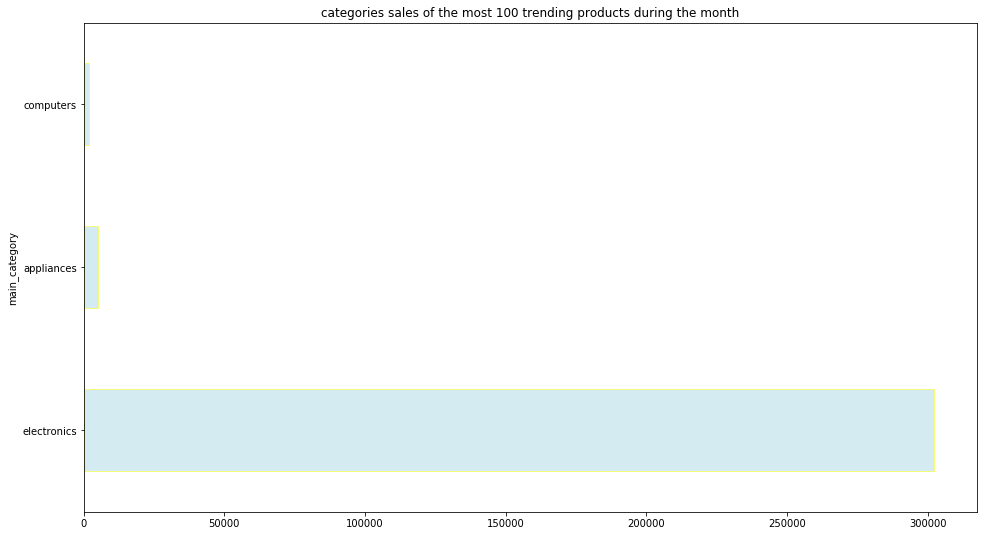

main_category
electronics    302300
appliances       5051
computers        1867
Name: product_id, dtype: int64

In [16]:
mod.trending_products(dataset_oct)

**november**

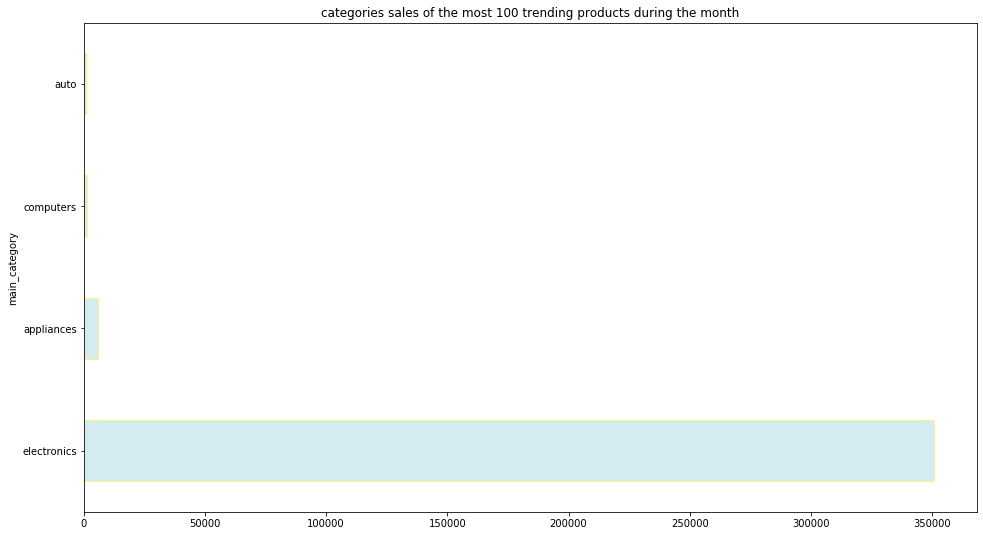

main_category
electronics    350756
appliances       5777
computers        1329
auto             1100
Name: product_id, dtype: int64

In [17]:
mod.trending_products(dataset_nov)

**plot the most visited subcategories**

* in the following analysis have been considered only views events and most trending sucategories


**october**

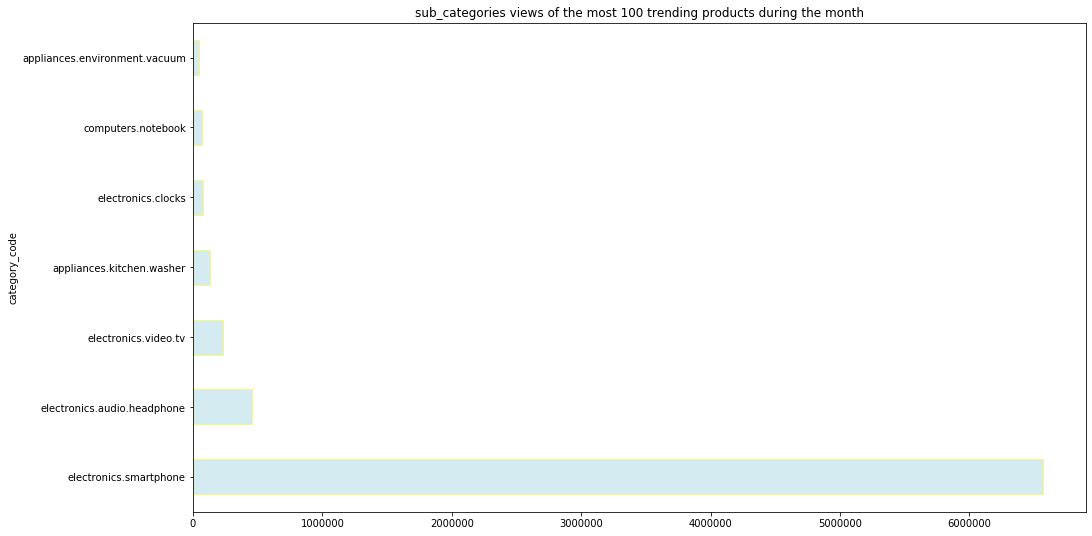

category_code
electronics.smartphone           6571673
electronics.audio.headphone       454024
electronics.video.tv              233093
appliances.kitchen.washer         131449
electronics.clocks                 74173
computers.notebook                 72500
appliances.environment.vacuum      46306
Name: product_id, dtype: int64

In [18]:
mod.subcategories(dataset_oct)

**november**

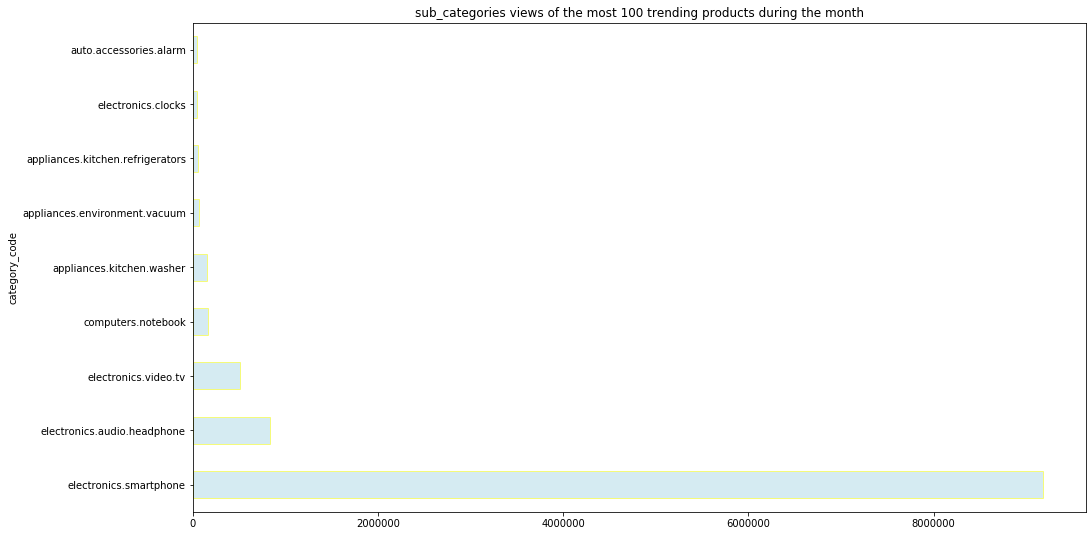

category_code
electronics.smartphone              9184569
electronics.audio.headphone          834027
electronics.video.tv                 512349
computers.notebook                   164784
appliances.kitchen.washer            148417
appliances.environment.vacuum         61307
appliances.kitchen.refrigerators      50804
electronics.clocks                    47069
auto.accessories.alarm                46286
Name: product_id, dtype: int64

In [19]:
mod.subcategories(dataset_nov)

**what are the ten most sold products per category?**

* In the following analysis have been taken into account only the categories of the most trending products. For each of this category are displayed the first ten products ordered by number of sales for product

**october**

In [20]:
mod.ten_most_sold(dataset_oct)

ELECTRONICS
product_id  main_category
1004856     electronics      28944
1004767     electronics      21806
1004833     electronics      12697
1005115     electronics      12543
4804056     electronics      12381
1004870     electronics      10615
1002544     electronics      10549
1004249     electronics       9090
1004836     electronics       7691
1005105     electronics       7293
Name: product_id, dtype: int64
APPLIANCES
product_id  main_category
3700926     appliances       1675
3600661     appliances       1482
3600163     appliances       1017
3600666     appliances        877
2900536     appliances        831
3601405     appliances        768
3601485     appliances        627
2701657     appliances        566
3601244     appliances        559
3701134     appliances        543
Name: product_id, dtype: int64
COMPUTERS
product_id  main_category
1307310     computers        1003
1307073     computers         864
1307366     computers         722
1307067     computers         651
1

**november**

In [21]:
mod.ten_most_sold(dataset_nov)

ELECTRONICS
product_id  main_category
1004856     electronics      32321
1004767     electronics      22613
1005115     electronics      22244
4804056     electronics      17800
1004833     electronics      13486
1002544     electronics      11678
1004870     electronics      10673
1005100     electronics      10132
1004249     electronics       8881
1005105     electronics       8483
Name: product_id, dtype: int64
APPLIANCES
product_id  main_category
3700926     appliances       1764
3600661     appliances       1742
3601405     appliances       1140
3600666     appliances       1131
2900958     appliances        903
3700766     appliances        895
3601603     appliances        895
3600163     appliances        879
2702277     appliances        675
3701134     appliances        624
Name: product_id, dtype: int64
COMPUTERS
product_id  main_category
1307310     computers        1329
1307545     computers         879
1307188     computers         829
1307073     computers         740
1

### <br><br><br><br>[RQ3] For each category, what’s the brand whose prices are higher on average?
#### * Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.


* in the following two cells is applied a function which adds the category to the dataset. As category is considered the first world (for example computers.notebooks has computers as category). As subcategory, instead ,it has been considered the category_code (for example computers.notebooks is the subcategory).

**For each category, what’s the brand whose prices are higher on average? Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.**

* in the following analysis, the aim is to give a picture of average brand prices for brands belonging to a specific category 

* in the following graphs are shown only the top 50 brands with the higher average price, due to the fact that using the entire dataset, the number of brands is high in a measure that it is not possibile to give a clear graphical representation.

**october**

computers


<Figure size 432x288 with 0 Axes>

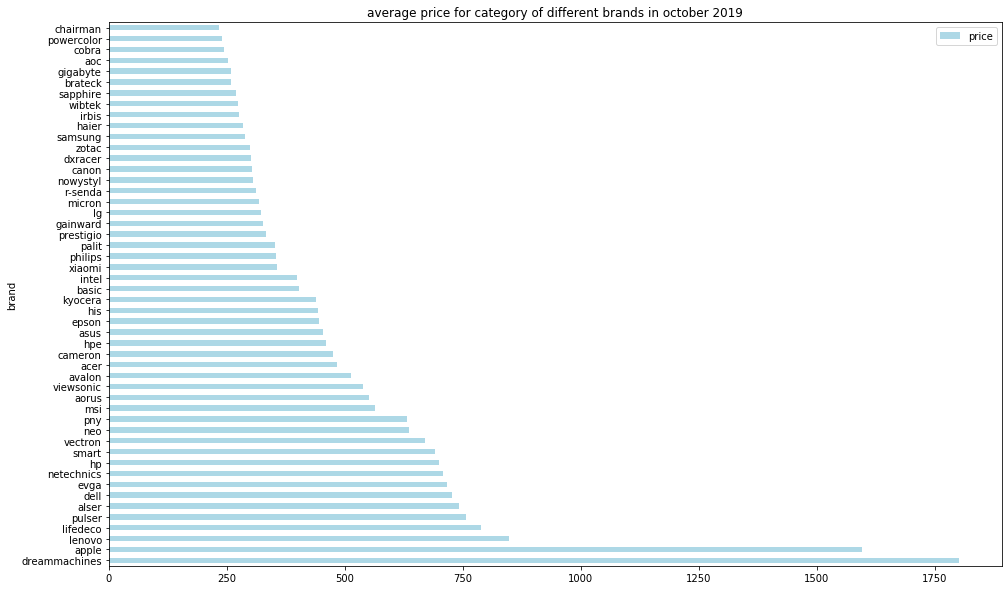

In [24]:
category_input=input().lower()
result_october=mod.average_price(category_input, dataset_oct)
result_october=result_october.sort_values(by=["price"], ascending=False)
result_october_first50=result_october.head(50)
plt.figure()
result_october_first50.plot.barh(figsize=(16,10),color="lightblue" ,title="average price for category of different brands in october 2019")
plt.show()

**november**

computers


<Figure size 432x288 with 0 Axes>

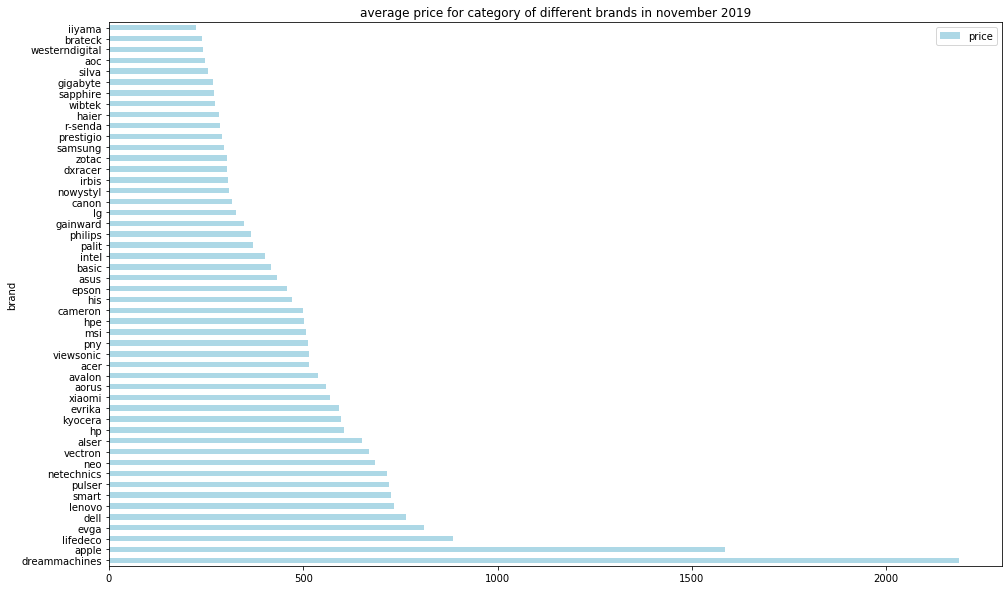

In [25]:
category_input=input().lower()
result_november=mod.average_price(category_input, dataset_nov)
result_november=result_november.sort_values(by=["price"], ascending=False)
result_november_first50=result_november.head(50)
import matplotlib.pyplot as plt
plt.figure()
result_november_first50.plot.barh(figsize=(16,10),color="lightblue" ,title="average price for category of different brands in november 2019")
plt.show()

#### * Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

**october**

In [26]:
categories=dataset_oct["main_category"].unique()
mod.most_expensive_brands(categories, dataset_oct)

,category,brand,average_price
0,medicine,omron,97.429912
1,stationery,hp,115.685154
2,apparel,cybex,325.472000
3,accessories,weekend,514.170000
4,country_yard,viking,692.069655
5,auto,schneider,788.612000
6,construction,telwin,1138.780000
7,furniture,aldit,1283.453750
8,appliances,jura,1679.017346
9,computers,dreammachines,1801.820000


**november**

In [27]:
categories1=dataset_nov["main_category"].unique()
mod.most_expensive_brands(categories1, dataset_nov)

,category,brand,average_price
0,medicine,omron,91.046132
1,stationery,hp,144.627117
2,accessories,weekend,514.170000
3,country_yard,viking,703.612857
4,auto,remeza,863.195714
5,apparel,sergiorossi,958.566429
6,appliances,cooperhunter,1674.226667
7,kids,hartan,1801.820000
8,electronics,rado,1841.715200
9,furniture,senspa,1930.542000


### <br><br><br><br>[RQ4] How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?

*function which calculates earnings*

* the task provided asks to calculate the profit, however this is not possible because, in order to calculate the profit, we should have information about cost for each product, which is not provided. So the analysis is limited to revenues.

* it is asked to the user the desired brand, and it is calculated for that brand the correspondig revenue

**october**

In [36]:
brand_name=input("insert a brand for october\n")
print("earnings for the brand in october are: ", mod.earnings(brand_name, dataset_oct))

insert a brand for october
apple
earnings for the brand in october are:  111189822.29


**november**

In [29]:
brand_name1=input("insert a brand for november\n")
print("earnings for the brand in november are: ", mod.earnings(brand_name1, dataset_nov))

insert a brand for november
apple
earnings for the brand in november are:  127490496.63000001


**Is the average price of products of different brands significantly different?**

* In this analysis is considered the inter-brand difference rather than the intra-brand difference. the dataset contains a wide range of categories and each of them has its own properties in terms of average price (for instance it is more probable that computers costs, on average, more than medicines). So there will be likely inter-brands distances that result relevant.

**october**

In [30]:
october=mod.price_difference(dataset_oct) 
describe_october=october.describe()

print(october,"\n")
print("descriptive statistics for the average prices of brands for october 2019\n".upper())
print(describe_october)

brand
mutsy               0.90
acqua               2.96
intro               3.84
global              3.84
nici                3.86
                  ...   
dreammachines    1801.82
hartan           1801.82
minimotors       2033.51
rado             2069.55
jura             2542.84
Name: price, Length: 1052, dtype: float64 

DESCRIPTIVE STATISTICS FOR THE AVERAGE PRICES OF BRANDS FOR OCTOBER 2019

count    1052.000000
mean      189.628142
std       266.753587
min         0.900000
25%        43.707781
50%        98.173333
75%       223.772793
max      2542.840000
Name: price, dtype: float64


**in the following histogram is displayed the distribution of average prices which can give a better idea of difference of prices between brands**

<function matplotlib.pyplot.show(*args, **kw)>

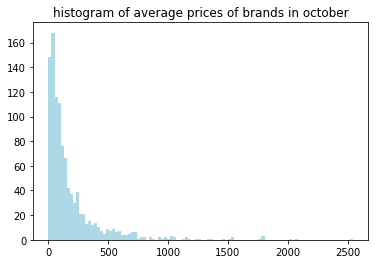

In [31]:
plt.figure()
plt.title("histogram of average prices of brands in october")
plt.hist(october,100,color="lightblue")
plt.show

**november**

In [32]:
november=mod.price_difference(dataset_nov)
describe_november=november.describe()

print(november,"\n")
print("descriptive statistics for the average prices of brands for november 2019\n".upper())
print(describe_november)


brand
soyntec             2.550000
dagee               2.930000
acqua               2.960000
intro               3.840000
inkax               3.860000
                    ...     
longines         1648.261667
louiserard       1657.700000
electro-voice    1713.645000
rado             1899.660000
dynacord         1919.480000
Name: price, Length: 1236, dtype: float64 

DESCRIPTIVE STATISTICS FOR THE AVERAGE PRICES OF BRANDS FOR NOVEMBER 2019

count    1236.000000
mean      185.731411
std       243.422706
min         2.550000
25%        45.860397
50%       100.941509
75%       227.483053
max      1919.480000
Name: price, dtype: float64


**in the following histogram is displayed the distribution of average prices which can give a better idea of difference of prices between brands**

<function matplotlib.pyplot.show(*args, **kw)>

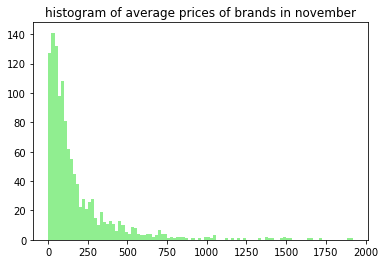

In [33]:
plt.figure()
plt.title("histogram of average prices of brands in november")
plt.hist(november,100,color="lightgreen")
plt.show

**Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing both the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).**

* for this analysis, which compares brand performance between two months, have been taken into account only the brands which are in both months.

In [34]:
mod.earnings_loss(dataset_oct,dataset_nov)

ava  had a percentage decrease, between october 2019 and november 2019 of 
 -97.66 %
evga  had a percentage decrease, between october 2019 and november 2019 of 
 -95.9 %
biostar  had a percentage decrease, between october 2019 and november 2019 of 
 -91.84 %


### <br><br><br><br> [RQ5] In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of the week show the hourly average of visitors your store has.

#### In what part of the day is your store most visited? 

In what part of the day is your store most visited? 16 o'clock
Number of views: 7270950


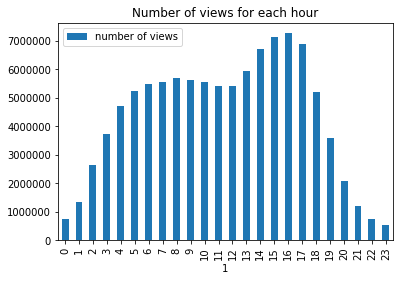

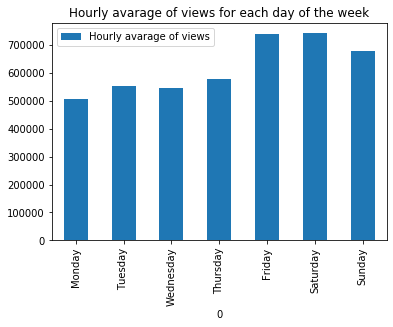

In [5]:
modd.request_five(dataset1)

### <br><br><br><br>[RQ6] The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?
#### * Find the overall conversion rate of your store.
#### * Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

Find the overall conversion rate of your store:
Overall conversion rate: 0.016


C:\Users\Zain\Desktop\ROMA\Sapienza\ADM\HW2\scripts\functions1.py:58: RuntimeWarning: overflow encountered in long_scalars
  df = pd.DataFrame({'overall conversion rate': [(num*100)/tot, (denom*100)/tot]},


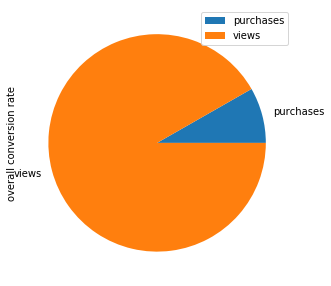

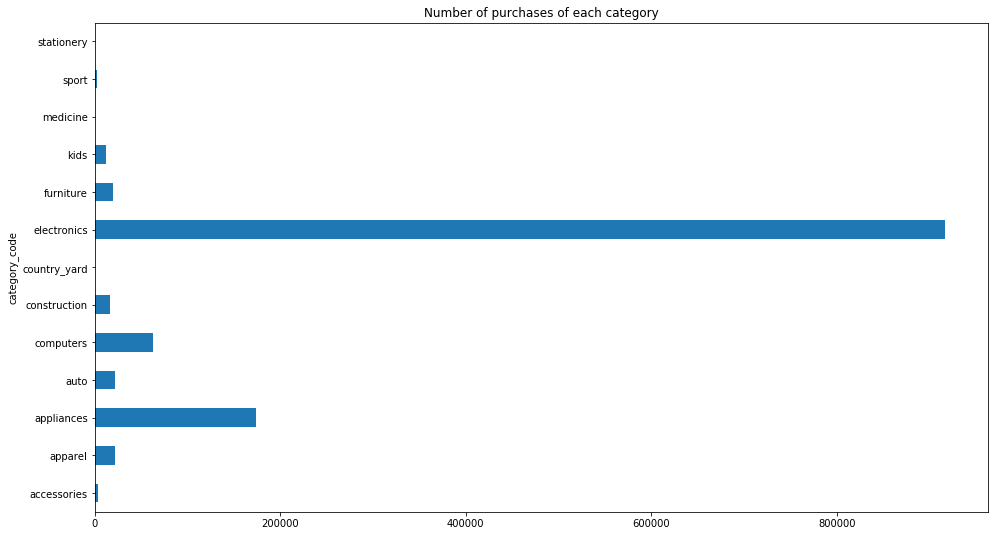

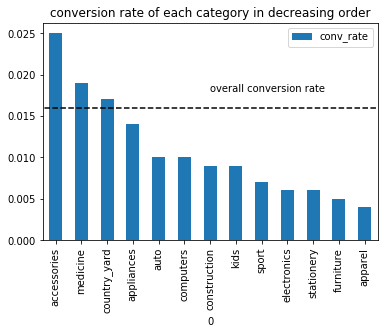

In [6]:
modd.request_six(dataset1)

### <br><br><br><br> [RQ7] The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.
#### * Prove that the pareto principle applies to your store.

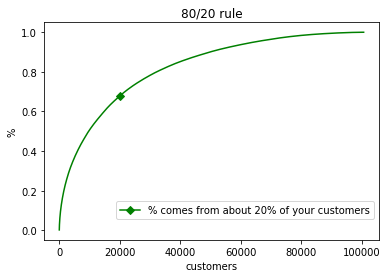

Most of your business, around 67%, likely comes from about 20% of your customers


In [10]:
modd.request_seven(dataset1)